In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! unzip '/content/walmart-recruiting-store-sales-forecasting.zip' -d '/content/destination_folder'

Mounted at /content/drive
Archive:  /content/walmart-recruiting-store-sales-forecasting.zip
  inflating: /content/destination_folder/features.csv.zip  
  inflating: /content/destination_folder/sampleSubmission.csv.zip  
  inflating: /content/destination_folder/stores.csv  
  inflating: /content/destination_folder/test.csv.zip  
  inflating: /content/destination_folder/train.csv.zip  


In [ ]:
! unzip '/content/destination_folder/features.csv.zip'
! unzip '/content/destination_folder/test.csv.zip'
! unzip '/content/destination_folder/train.csv.zip'
! unzip '/content/destination_folder/stores.csv'

Archive:  /content/destination_folder/features.csv.zip
  inflating: features.csv            
Archive:  /content/destination_folder/test.csv.zip
  inflating: test.csv                
Archive:  /content/destination_folder/train.csv.zip
  inflating: train.csv               
Archive:  /content/destination_folder/stores.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/destination_folder/stores.csv or
        /content/destination_folder/stores.csv.zip, and cannot find /content/destination_folder/stores.csv.ZIP, period.


In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [223]:
feature=pd.read_csv('/content/features.csv')
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [224]:
feature.info

<bound method DataFrame.info of       Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0 

In [231]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,3462.595547,1207.059049,776.513540,1392.763115,2043.430855,173.196752,7.825334
std,12.987966,18.678607,0.431337,7388.608211,5495.537791,7539.948322,4707.111488,9431.217105,38.384486,1.808971
min,1.000000,-7.290000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.653774,6.833000
50%,23.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [230]:
feature.isnull().any()

Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
IsHoliday       False
dtype: bool

In [229]:
feature["CPI"].fillna(feature["CPI"].median(),inplace=True)
feature["Unemployment"].fillna(feature["Unemployment"].median(),inplace=True)
for i in range(1,6):
  feature["MarkDown"+str(i)] = feature["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  feature["MarkDown"+str(i)].fillna(value=0,inplace=True)
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,False


In [228]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [227]:
print(feature.Store.unique())
print(len(feature.Date.unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
182


In [226]:
train=pd.read_csv('/content/train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [225]:
stores=pd.read_csv('/content/stores.csv')
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
test=pd.read_csv('/content/test.csv')
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [232]:
train = pd.merge(train,stores,on='Store',how='left')
train = pd.merge(train,feature,on=['Store','Date'],how='left')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False


In [233]:
train['Date'] = pd.to_datetime(train['Date'])
train.sort_values(by=['Date'],inplace=True)
train.set_index(train.Date, inplace=True)

In [234]:
train.drop(columns='IsHoliday_x',inplace=True)
train.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [235]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.week
train.head()

<ipython-input-235-3068cc6b8bb0>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['Week'] = train['Date'].dt.week


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


In [236]:
agg_data = train.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [237]:
store_data = pd.merge(left=train,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
train = store_data.copy()
del store_data

In [238]:
train['Date'] = pd.to_datetime(train['Date'])
train.sort_values(by=['Date'],inplace=True)
train.set_index(train.Date, inplace=True)
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [239]:
train['Total_MarkDown'] = train['MarkDown1']+train['MarkDown2']+train['MarkDown3']+train['MarkDown4']+train['MarkDown5']
train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [240]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = train[numeric_col].copy()
train.shape

(421533, 20)

In [241]:
train=train[train['Weekly_Sales']>=0]
train['IsHoliday'] = train['IsHoliday'].astype('int')
train

<ipython-input-241-7b47efbfabc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['IsHoliday'] = train['IsHoliday'].astype('int')


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


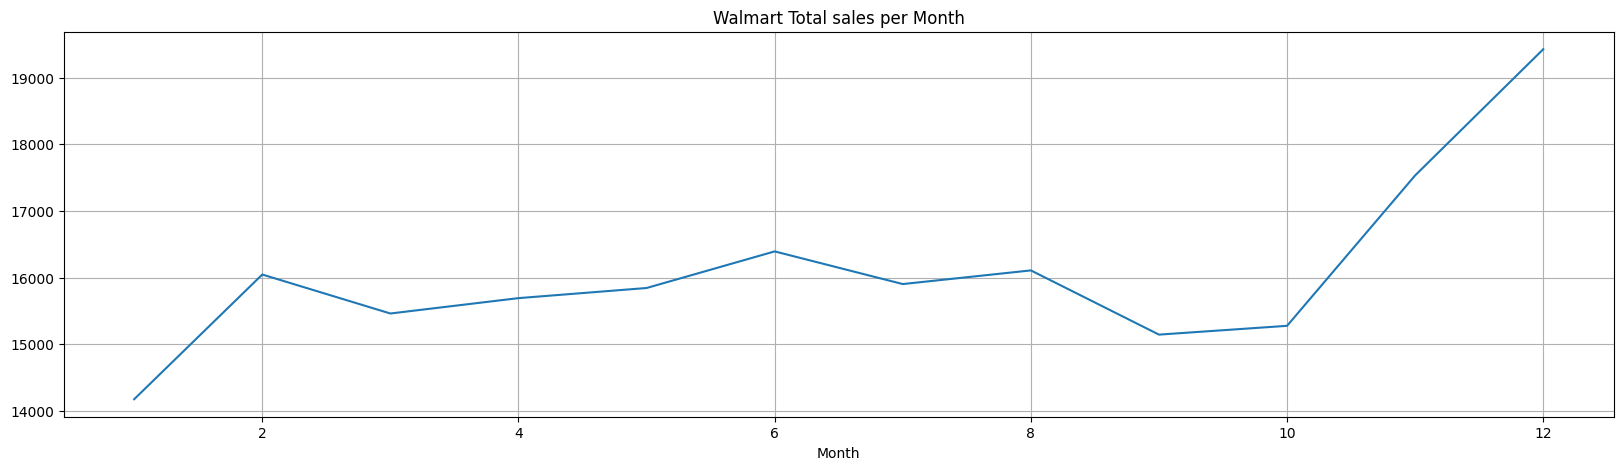

In [ ]:
sales =train.groupby(by='Month')['Weekly_Sales'].aggregate('mean')
sales.plot(figsize=(20,5))
plt.title('Walmart Total sales per Month')
plt.grid()

In [ ]:
data_monthly = pd.crosstab(train["Year"], train["Month"], values=train["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.903360e+08,1.819236e+08,2.314140e+08,1.867116e+08,1.922469e+08,2.325827e+08,1.876416e+08,1.772717e+08,2.171696e+08,2.028552e+08,2.887661e+08
2011,1.637054e+08,1.863326e+08,1.793600e+08,2.265291e+08,1.816491e+08,1.897750e+08,2.299150e+08,1.886016e+08,2.208554e+08,1.832631e+08,2.101605e+08,2.880830e+08
2012,1.688965e+08,1.920652e+08,2.315138e+08,1.889227e+08,1.887691e+08,2.406116e+08,1.875112e+08,2.368547e+08,1.806480e+08,1.843628e+08,NaN,NaN


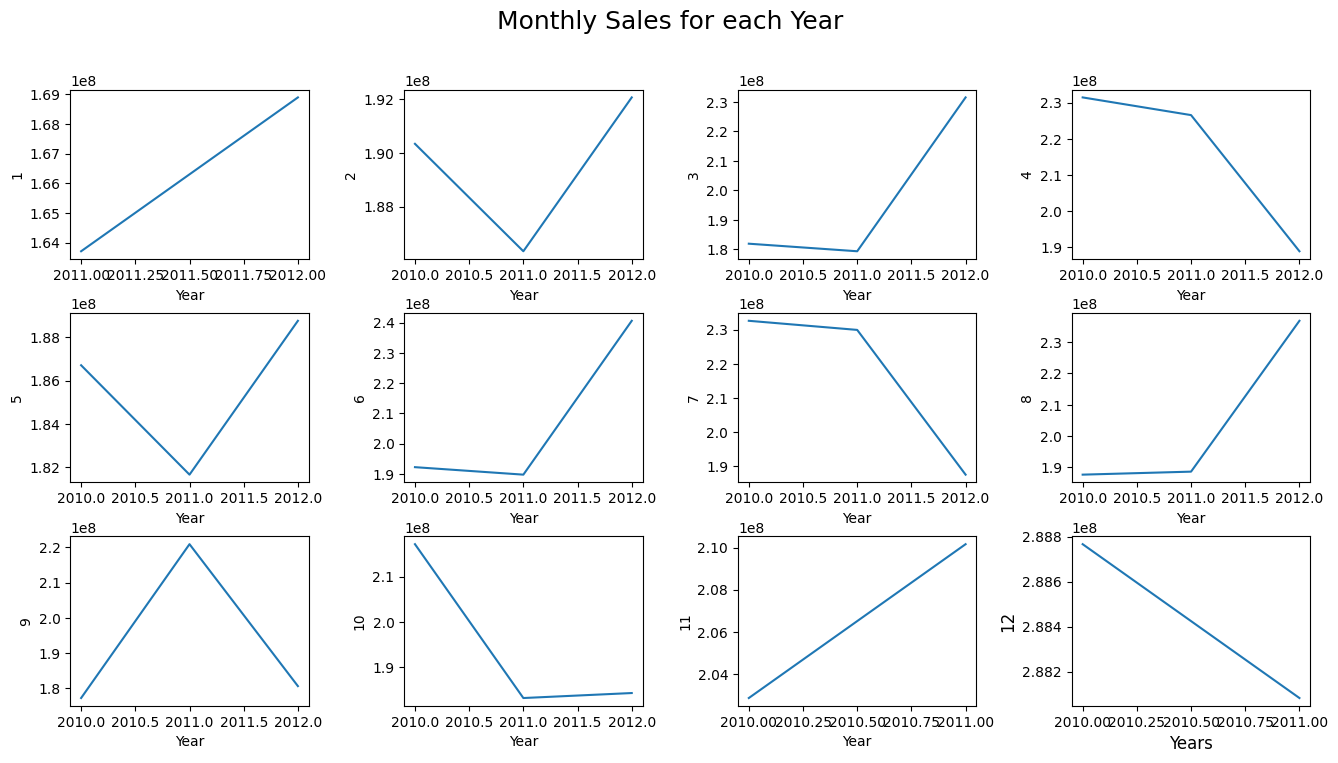

In [ ]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

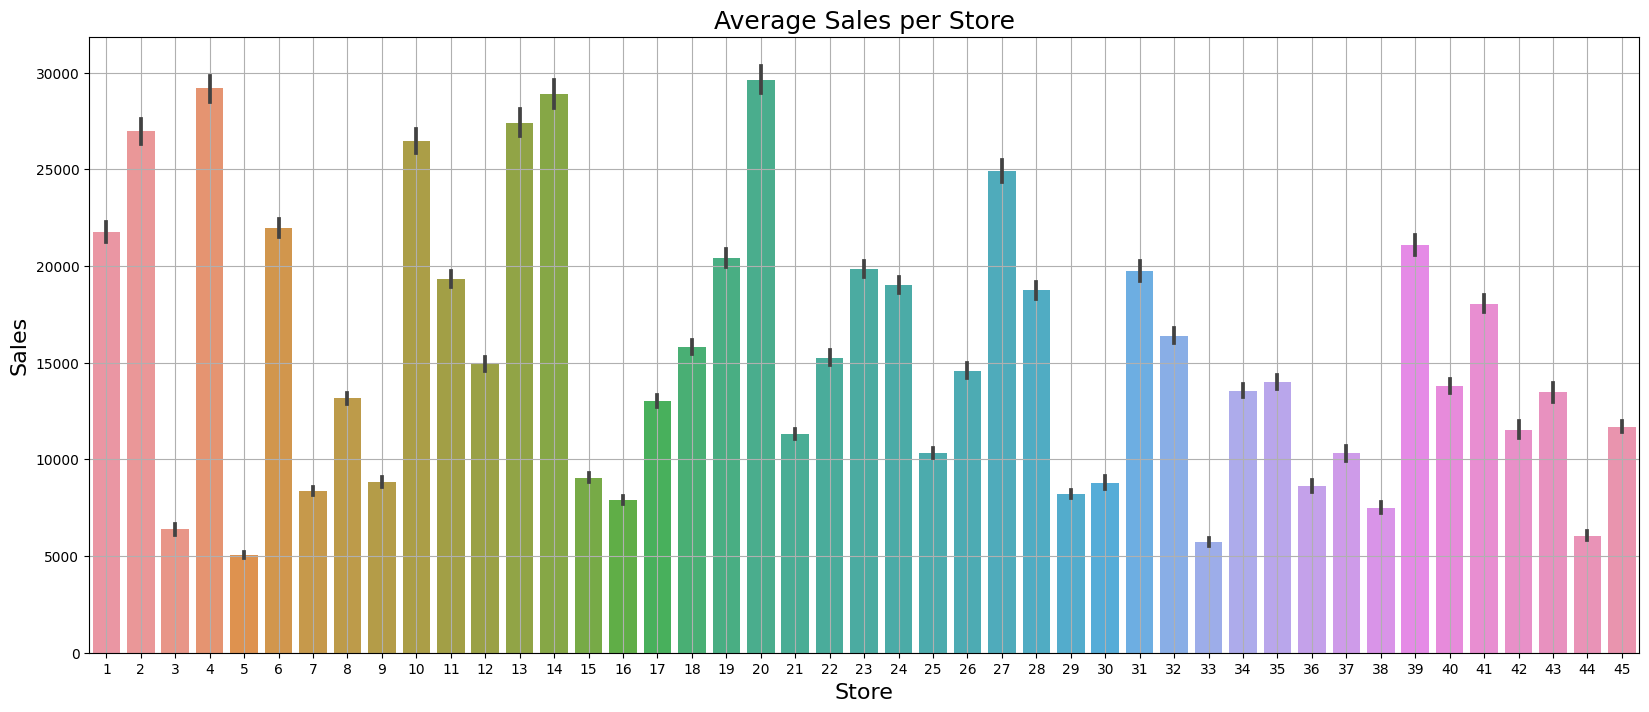

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=train)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

Month
1      8859436.72
2     13841751.64
3     14893811.96
4     16740440.54
5     15209317.04
6     16980122.89
7     17972447.09
8     17981427.23
9     15997175.32
10    16172911.23
11    11133059.99
12    15560954.21
Name: Weekly_Sales, dtype: float64


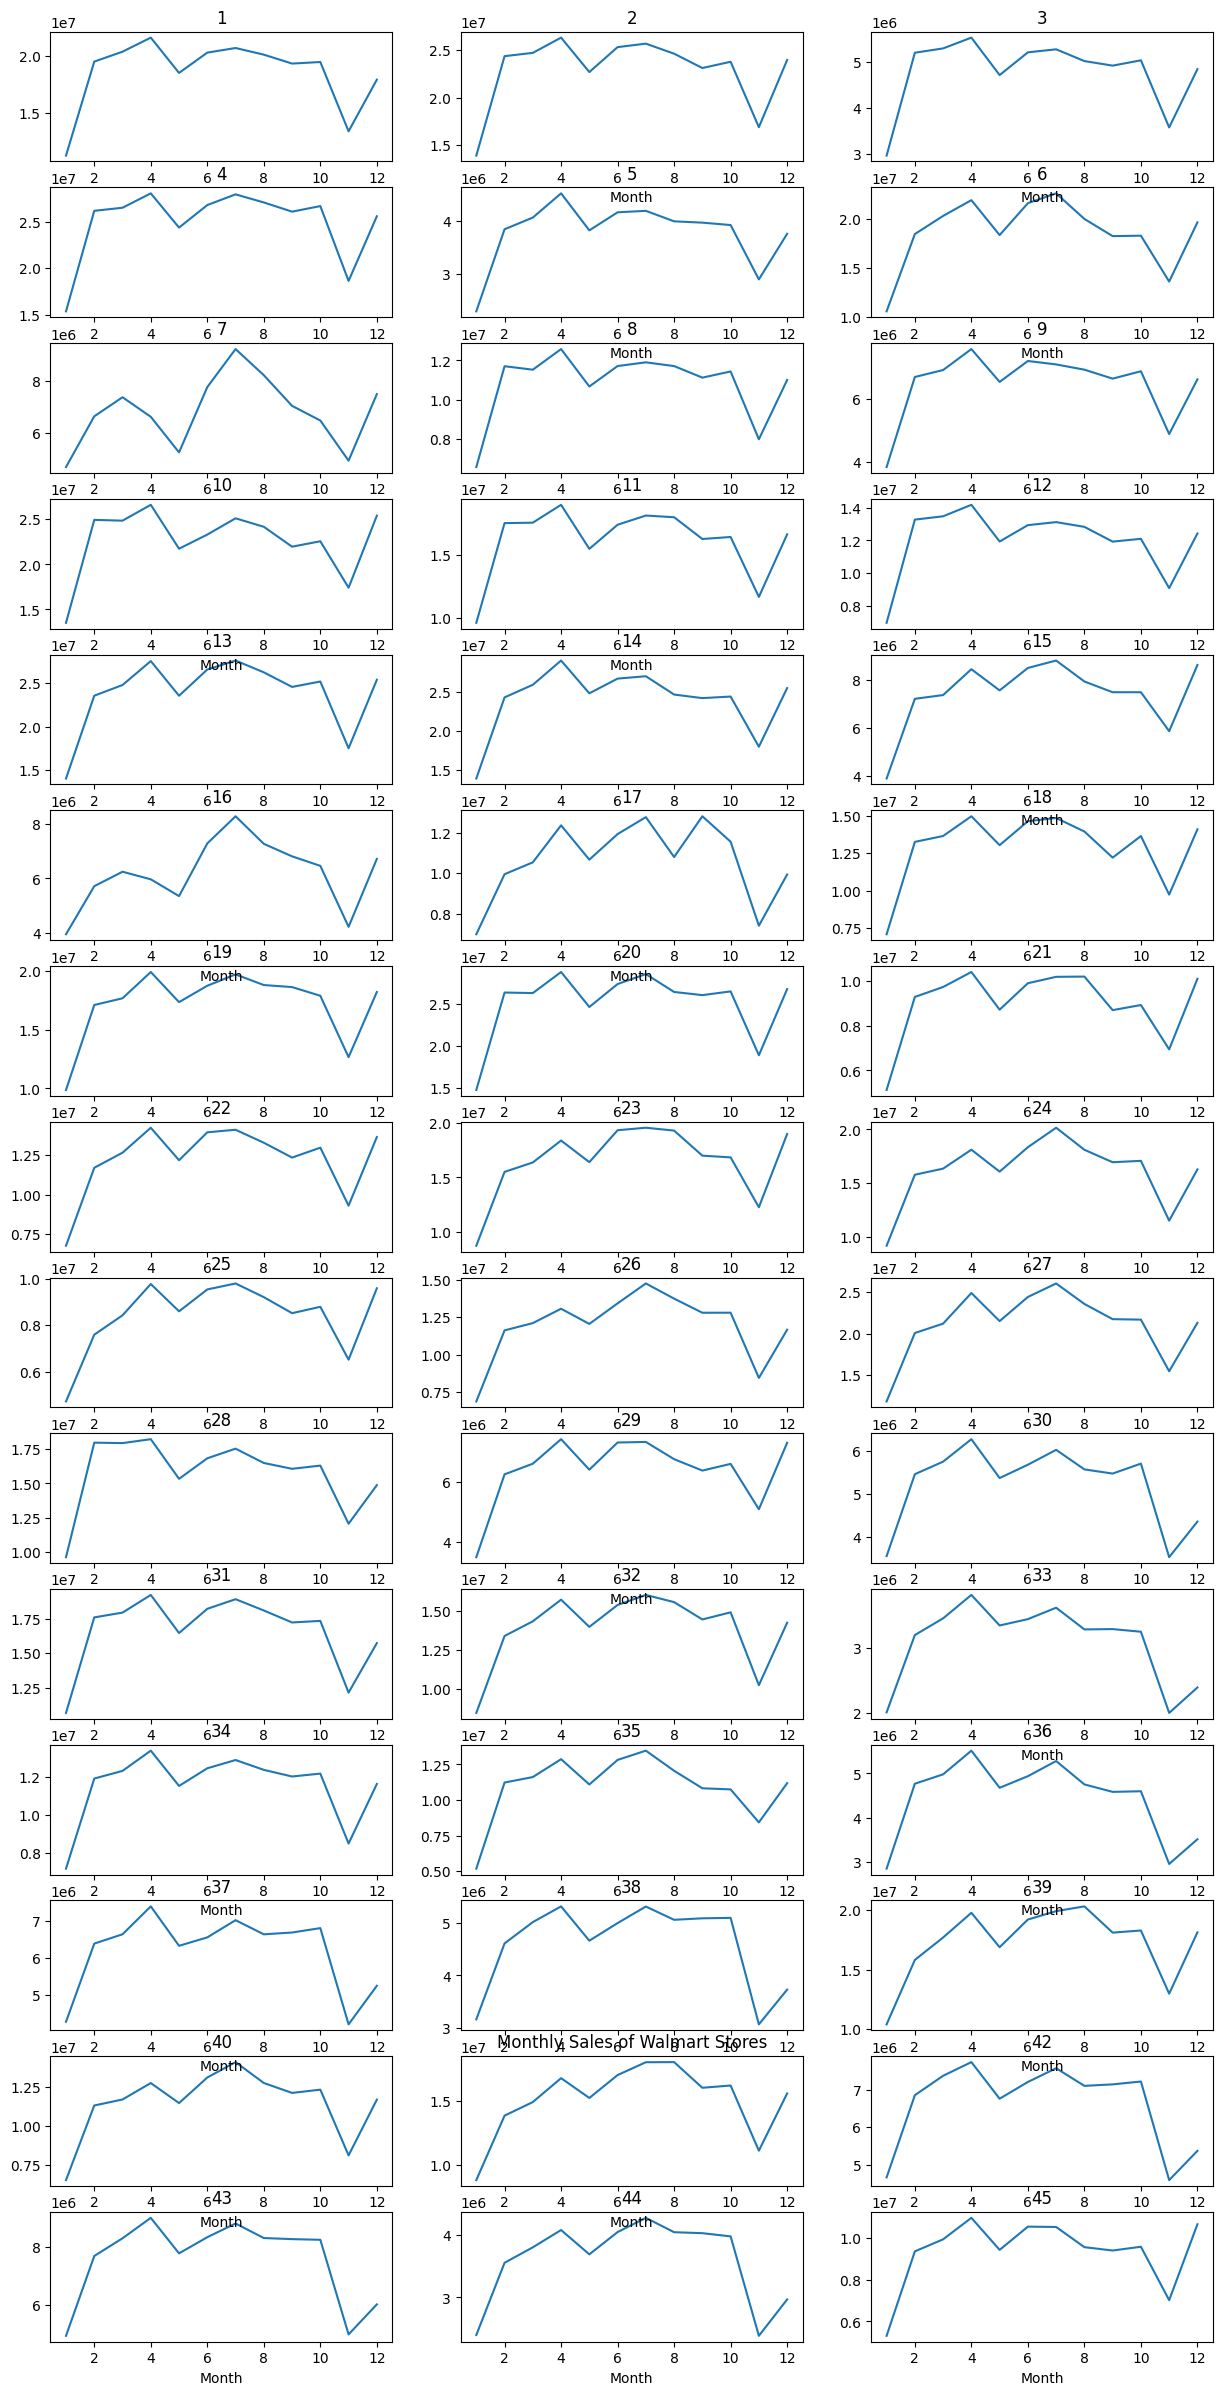

In [ ]:
plt.figure(figsize=(15,30))
plt.tight_layout()
for store in train.Store.unique():
    data = train[train.Store==store].groupby('Month')['Weekly_Sales'].sum()
    plt.subplot(15,3,store)
    plt.title(store)
    data.plot()
plt.title('Monthly Sales of Walmart Stores')
print(data)

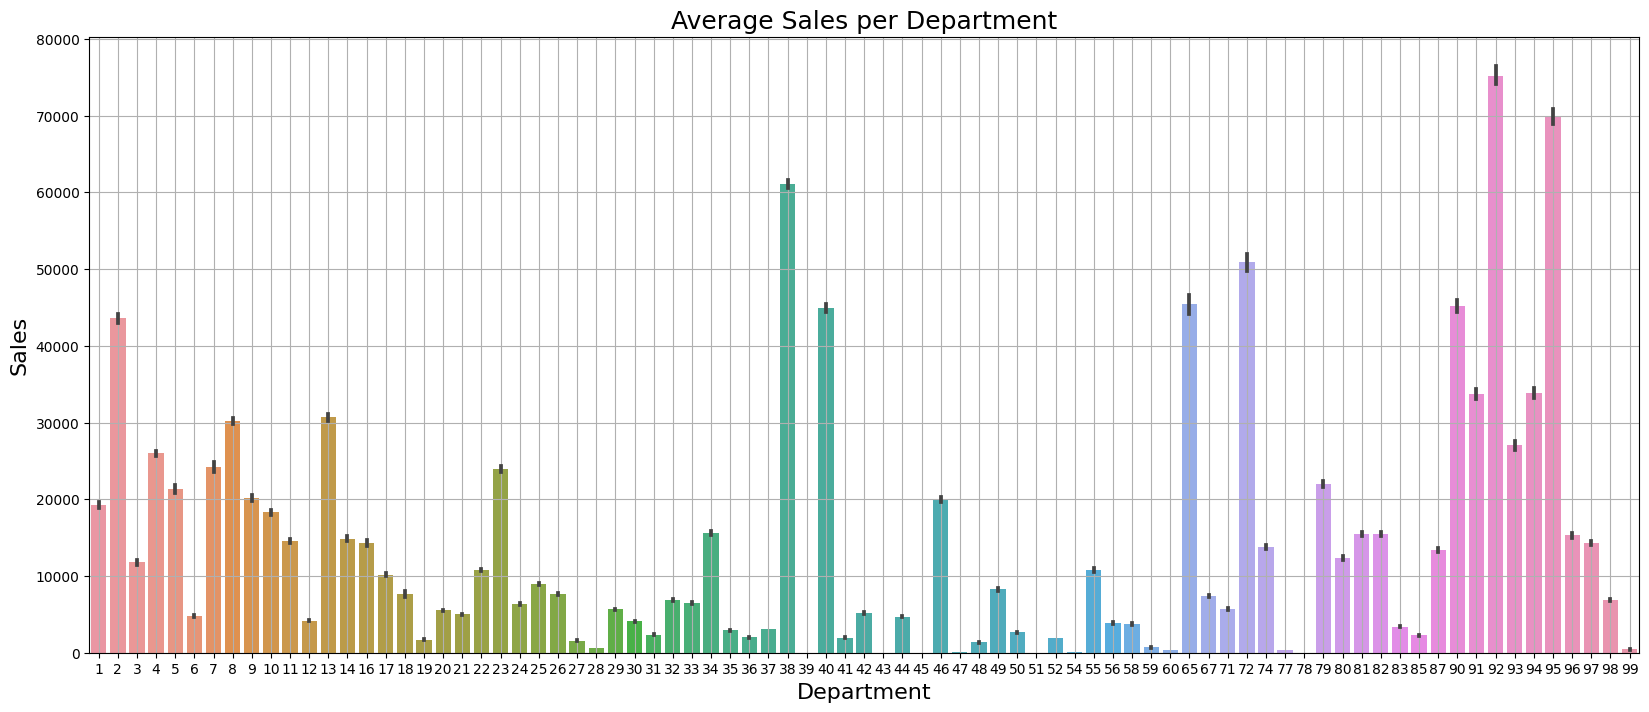

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=train)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

16031.504531521416


<Axes: >

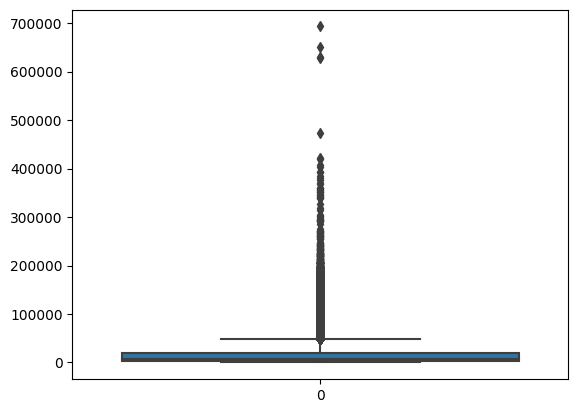

In [ ]:
print(train.Weekly_Sales.mean())
sns.boxplot(train.Weekly_Sales)

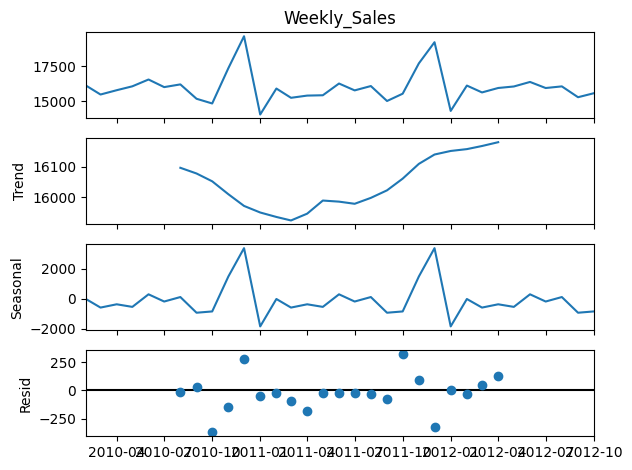

In [ ]:
sm.tsa.seasonal_decompose(train['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

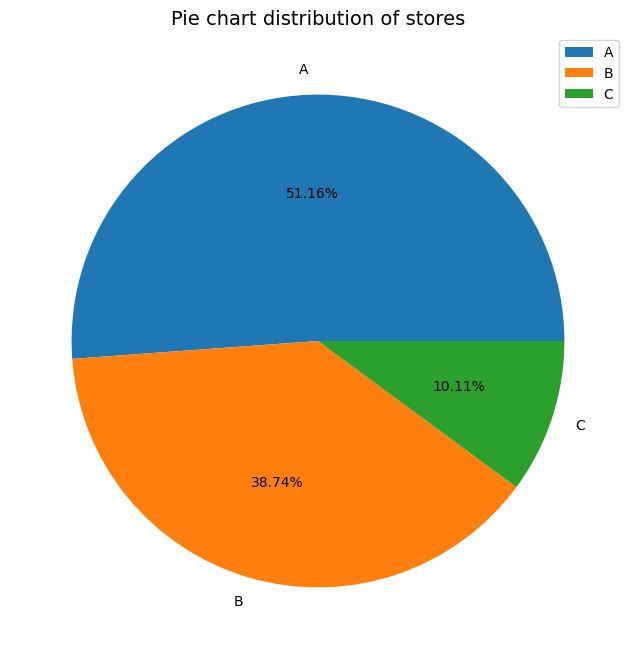

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(train['Type'].value_counts(),labels=['A','B','C'],autopct='%0.2f%%')
plt.title("Pie chart distribution of stores",fontsize=14)
plt.legend()
plt.show()

In [242]:
cat_col = ['Store','Dept','Type']
data_cat = train[cat_col].copy()
data_cat.head()

,Store,Dept,Type
Date,,,
2010-02-05,1,1,A
2010-02-05,9,97,B
2010-02-05,9,85,B
2010-02-05,8,80,A
2010-02-05,9,55,B


In [243]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [244]:
train=pd.concat([train,data_cat],axis=1)
train.shape

(420254, 149)

In [245]:
train.drop(columns=cat_col,inplace=True)
train.drop(columns=['Date'],inplace=True)
train.shape

(420254, 145)

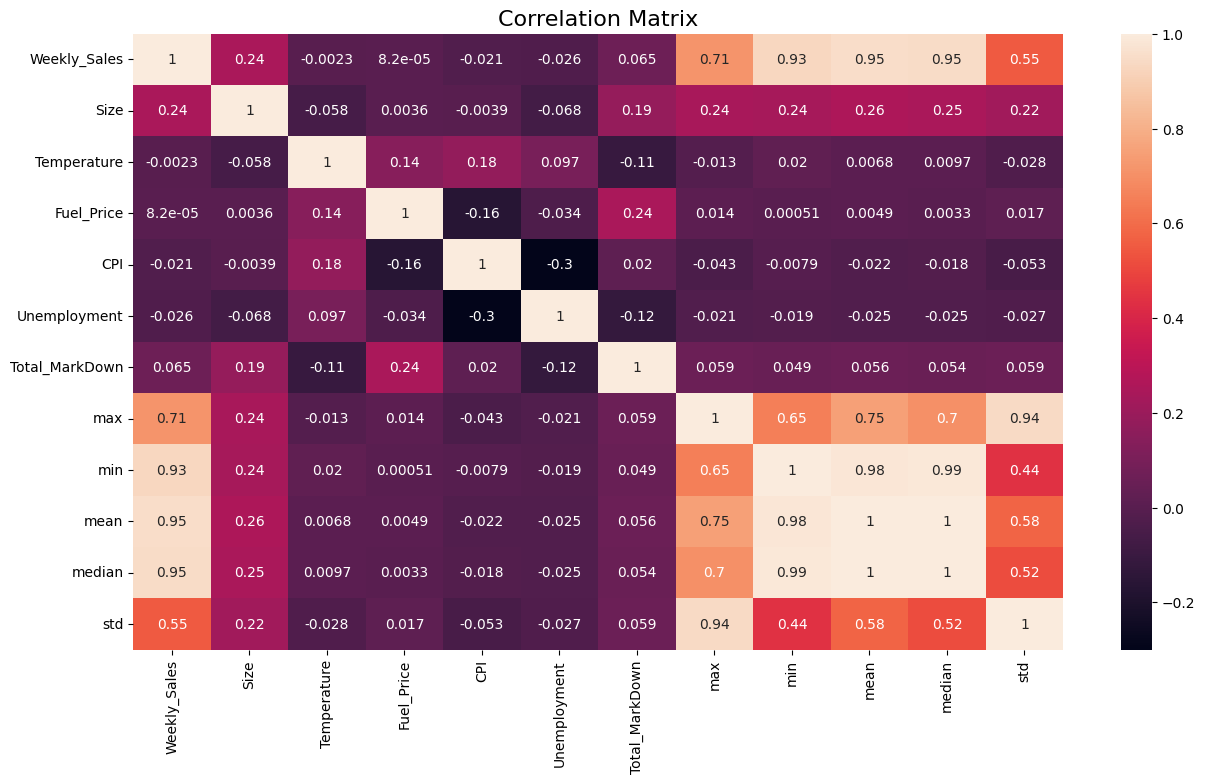

In [246]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']
plt.figure(figsize=(15,8))
corr = train[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

In [247]:
X=train.drop('Weekly_Sales',axis=1)
Y=train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.head()

,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-27,120653,72.97,3.701,138.203387,8.535,0,2012,7,30,2566.51,...,0,0,0,0,0,0,0,0,1,0
2012-06-15,184109,81.33,3.393,220.449415,6.989,0,2012,6,24,16126.56,...,0,0,0,0,0,0,0,1,0,0
2010-12-10,155078,42.47,2.843,214.815521,6.433,0,2010,12,49,6232.03,...,0,0,0,0,0,0,0,1,0,0
2010-07-02,202505,80.34,2.669,212.746898,6.973,0,2010,7,26,6712.54,...,0,0,0,0,0,0,0,1,0,0
2012-04-27,152513,43.60,4.023,137.978133,7.489,0,2012,4,17,11496.92,...,0,0,0,0,0,0,0,1,0,0


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model =RandomForestRegressor(criterion='entropy')
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
rf_predictions = rf_model.predict(X_test)
rf_df=pd.DataFrame({'Actual':Y_test,'Predicted':rf_predictions})
rf_df

,Actual,Predicted
Date,,
2011-03-11,62.30,486.9107
2012-04-06,490.63,451.5026
2011-04-22,709.50,654.2006
2010-05-28,24143.04,24626.6410
2011-10-07,38251.38,34451.8608
...,...,...
2010-08-06,790.50,951.2752
2010-02-05,4229.18,3179.2925
2012-08-03,901.62,1030.6005


In [248]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
rf_acc = rf_model.score(X_test,Y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)
print("MAE" , metrics.mean_absolute_error(Y_test, rf_predictions))
print("MSE" , metrics.mean_squared_error(Y_test, rf_predictions))
print("RMSE" , np.sqrt(metrics.mean_squared_error(Y_test,rf_predictions)))
print("R2" , metrics.explained_variance_score(Y_test,rf_predictions))

Random Forest Regressor Accuracy -  97.38511246051547
MAE 1388.2818481469583
MSE 13368017.94449083
RMSE 3656.2300179954254
R2 0.9738517586340811


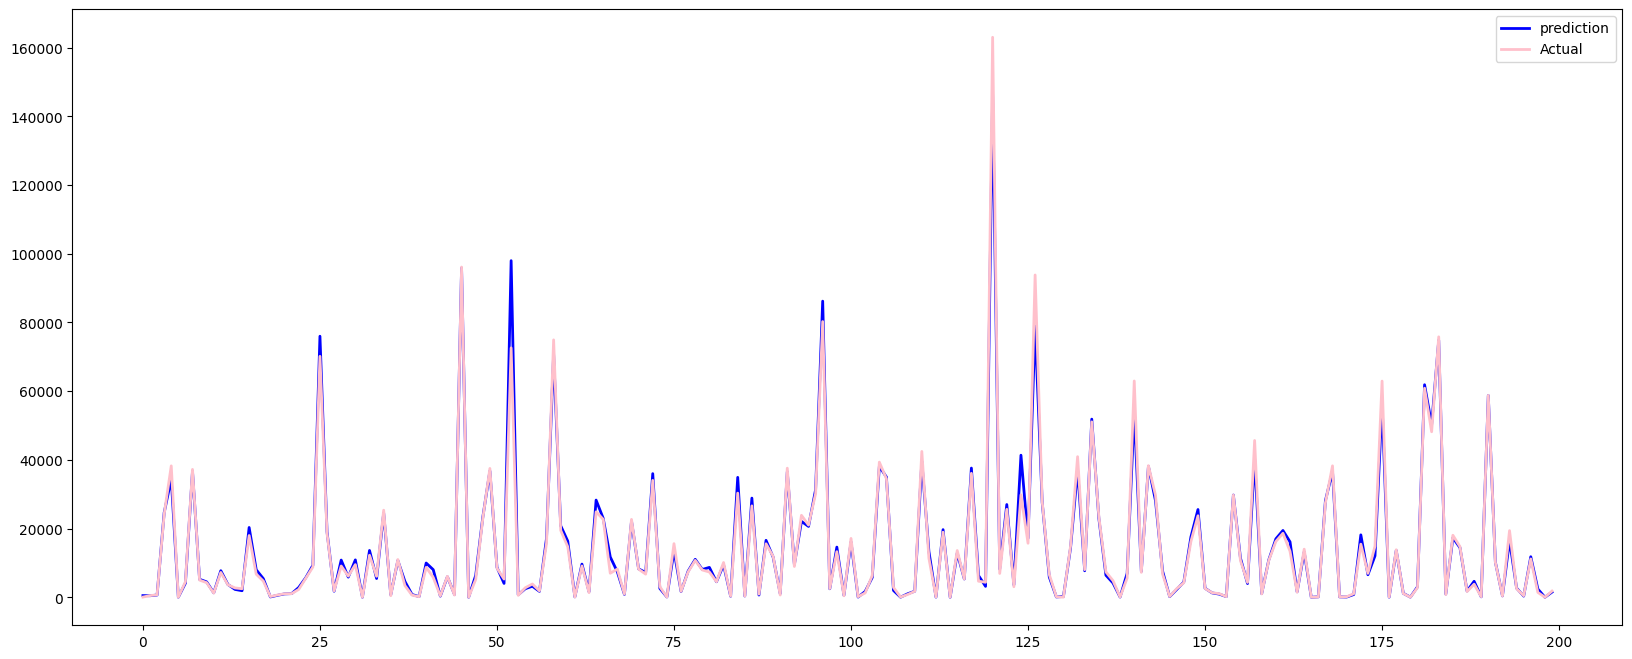

In [249]:
plt.figure(figsize=(20,8))
plt.plot(rf_model.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[:200].values, label="Actual", linewidth=2.0,color='pink')
plt.legend(loc="best")
plt.show()

In [250]:
import pickle
from os import path

In [ ]:
pkl_filename = "./randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)
  print("Saved model to disk")
else:
  print("Model already saved")

# **XGBOOST**

In [252]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [254]:
xgb_acc = xgbr.score(X_test,Y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.46896528845474


In [271]:
y_pred = xgbr.predict(X_test)
print("MAE" , metrics.mean_absolute_error(Y_test, y_pred))
print("MSE" , metrics.mean_squared_error(Y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("R2" , metrics.explained_variance_score(Y_test, y_pred))

MAE 1673.2095818498824
MSE 12939339.429005096
RMSE 3597.1293317039763
R2 0.9746896606390472


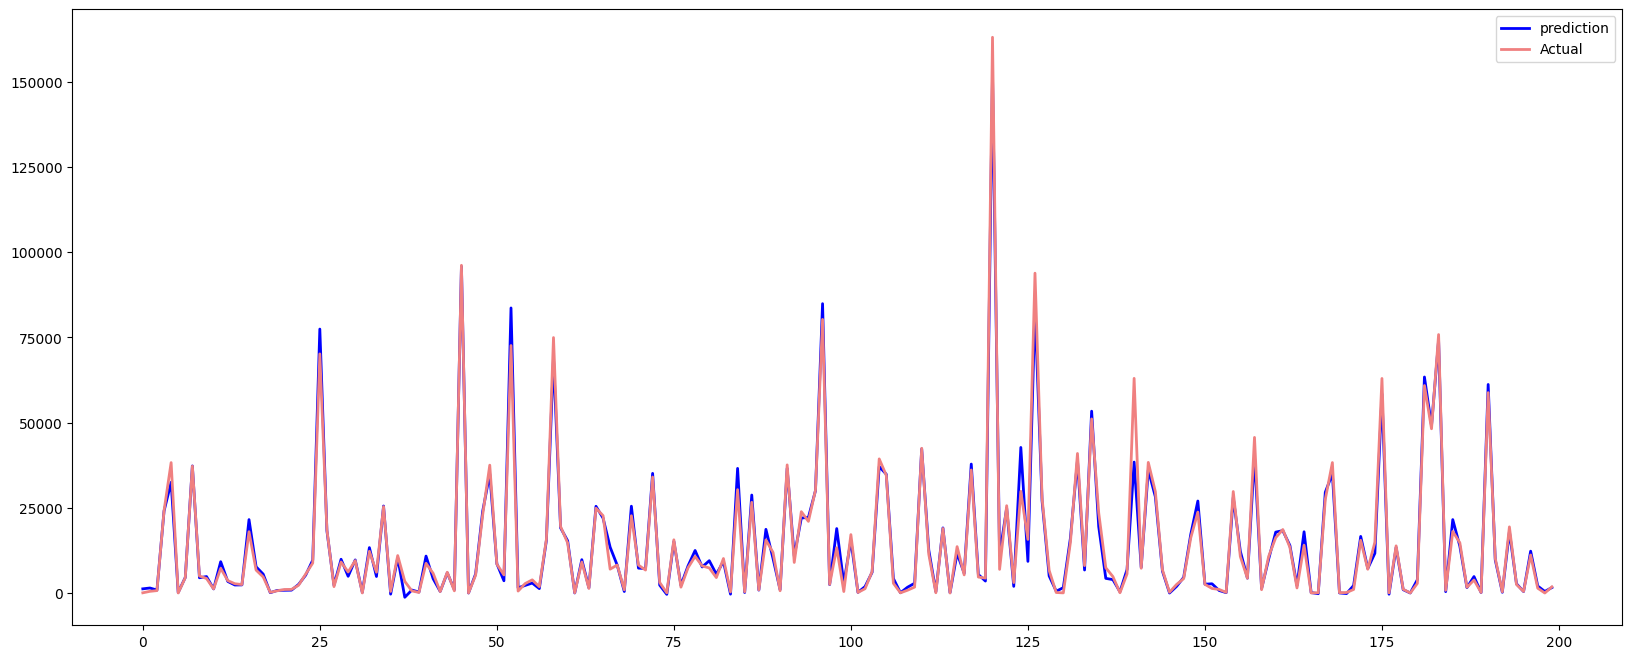

In [258]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[:200].values, label="Actual", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [259]:
pkl_filename = "./xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Decision Tree**

In [264]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth=4,splitter='best')
model1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4)

In [266]:
d_y_predict = model1.predict(X_test)
d_y_predict

array([ 6899.66242141,   755.48816365,   755.48816365, ...,
         755.48816365,   755.48816365, 10620.2280267 ])

In [280]:
dec_acc = model1.score(X_test,Y_test)*100
print("XGBoost Regressor Accuracy - ",dec_acc)

XGBoost Regressor Accuracy -  89.69375197538243


In [278]:
print("MAE" , metrics.mean_absolute_error(Y_test, d_y_predict))
print("MSE" , metrics.mean_squared_error(Y_test, d_y_predict))
print("RMSE" , np.sqrt(metrics.mean_squared_error(Y_test, d_y_predict)))
print("R2" , metrics.explained_variance_score(Y_test, d_y_predict))

MAE 3019.0848885173573
MSE 52688349.48084246
RMSE 7258.674085591835
R2 0.8969382511412303


In [273]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

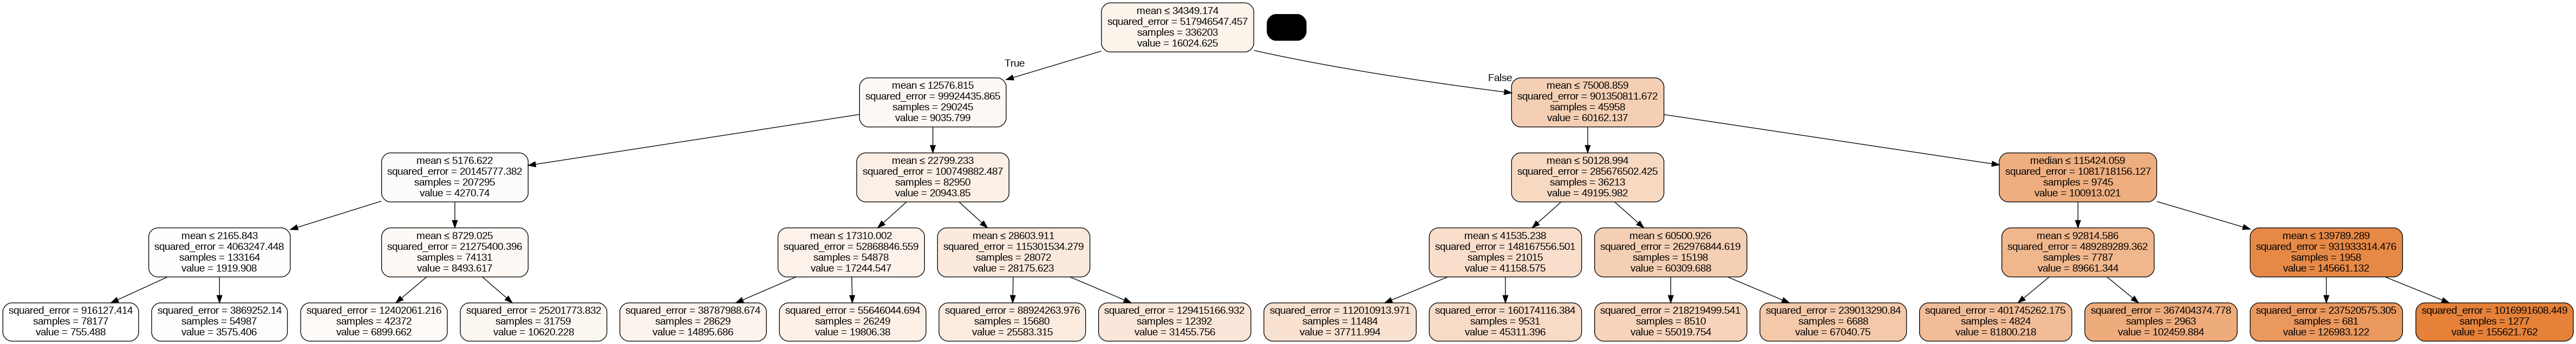

In [274]:
dot_data =StringIO()
export_graphviz(model1,out_file=dot_data,feature_names= X.columns,
                filled=True,rounded= True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [275]:
pkl_filename = "./decisiontree_regressor.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(model1, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Comparing Models**

In [294]:
acc = {'Model':['RandomForest','Decision Tree','XGboost'],'Accuracy':[rf_acc,dec_acc,xgb_acc]}
acc_df = pd.DataFrame(acc)
acc_df

,Model,Accuracy
0,RandomForest,97.385112
1,Decision Tree,89.693752
2,XGboost,97.468965


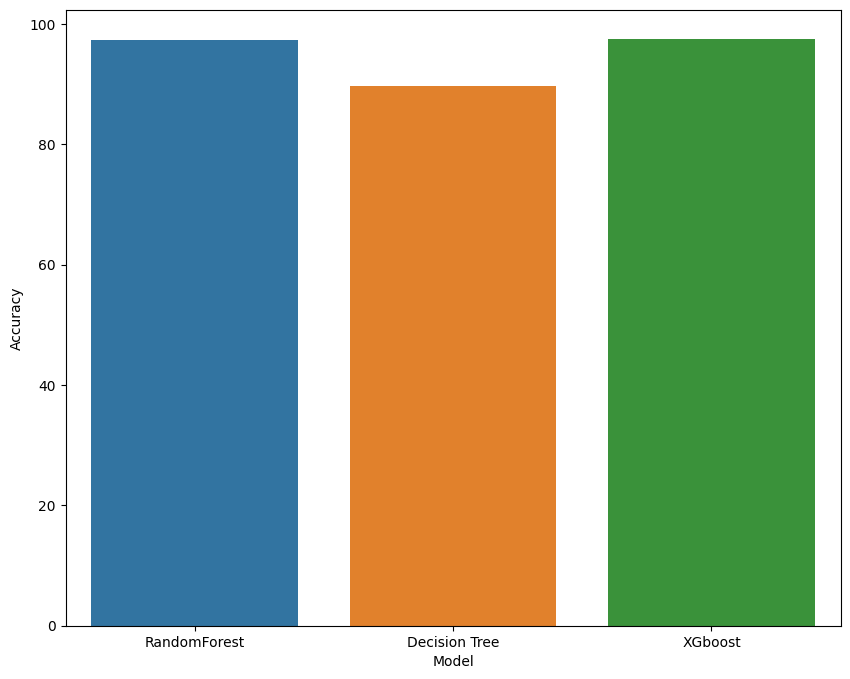

In [295]:
plt.figure(figsize=(10,8))
sns.barplot(x='Model',y='Accuracy',data=acc_df)
plt.show()